<a href="https://colab.research.google.com/github/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/blob/master/end_to_end_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("imputeTS")
install.packages("mice")
install.packages("CatEncoders")
install.packages("missForest")
install.packages("finalfit")
install.packages("tidyverse")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘xts’, ‘TTR’, ‘RCurl’, ‘png’, ‘jpeg’, ‘quadprog’, ‘quantmod’, ‘gridtext’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘ggtext’, ‘stinepack’, ‘forecast’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘data.table’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘randomForest’, ‘foreach’, ‘itertools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘bdsmatrix’, ‘GGally’, ‘gridExtra’, ‘lme4’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspe

In [ ]:
library(CatEncoders)
library(tidyverse)
library(missForest) #gerar dados ausentes
library(finalfit) #vizualização de dados ausentes
library(mice) #pacote para imputação de dados



Attaching package: ‘CatEncoders’


The following object is masked from ‘package:base’:

    transform


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: itertools

Loading required package: iterators




##<h1><b>1. Get Data </b></h1>

Download e leitura dos dados 


In [ ]:
temp <- tempfile()
download.file("https://github.com/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/raw/master/housing.zip",temp)
data <- read.csv(unz(temp, "housing.csv"))
unlink(temp)
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


Vemos abaixo que o dataset possui 10 colunas(features) e um total de 19852 instâncias. Note também que o atributo total_bedrooms possui 196 instâncias não preenchidas(null). 


In [ ]:
summary(data)


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.92   1st Qu.:18.00      1st Qu.: 1447  
 Median :-118.4   Median :34.22   Median :29.00      Median : 2124  
 Mean   :-119.6   Mean   :35.62   Mean   :28.85      Mean   : 2631  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3136  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5685  
 Median : 435.0   Median : 1164   Median : 409.0   Median : 3.5432  
 Mean   : 538.3   Mean   : 1423   Mean   : 499.9   Mean   : 3.8779  
 3rd Qu.: 647.0   3rd Qu.: 1721   3rd Qu.: 604.0   3rd Qu.: 4.7447  
 Max.   :6445.0   Max.   :35682   

##<h1><b>2. Criando os conjuntos de Test, Training e Validation.     </b></h1>


In [ ]:
split_data = function (data,porcentagem,semente) {
    set.seed(semente)
    smp_size <- floor(porcentagem* nrow(data))    
    indices =  sample( seq_len(nrow(data)), size = smp_size )
    return ( list(data[indices, ],data[-indices,]) )
}

In [ ]:
data_aux   <- split_data ( data , 0.85 ,1) 
data_train <- as.data.frame(data_aux[1])
data_test  <- as.data.frame(data_aux[2])

data_aux   <- split_data ( data , 0.80 ,2) 
data_train <- as.data.frame(data_aux[1])
data_val  <- as.data.frame(data_aux[2])

cat("Data Training possui : ", nrow(data_train),"instâncias\n")
cat("Data Validation possui : ", nrow(data_val),"instâncias\n")
cat("Data Test possui : ", nrow(data_test),"instâncias\n")


Data Training possui :  15881 instâncias
Data Validation possui :  3971 instâncias
Data Test possui :  2978 instâncias


##<h1><b>3. Discover and Visualize the Data to Gain Insights</b></h1>




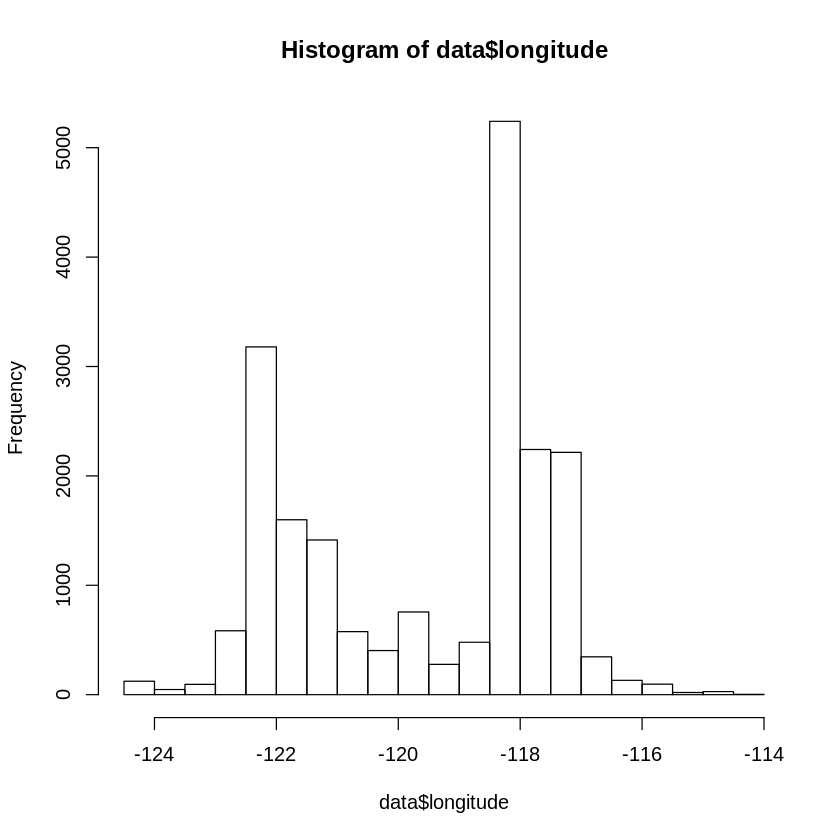

In [ ]:
hist(data$longitude)

In [ ]:
data_aux <- data
data_aux$ocean_proximity <- NULL
cor(data_aux, method = c("pearson"))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92743812,-0.10941870,0.04459889,NA,0.101277884,0.056502671,-0.021798676,-0.05325806
latitude,-0.92743812,1.00000000,0.01246308,-0.03249653,NA,-0.107180029,-0.069317117,-0.067044576,-0.12998634
housing_median_age,-0.10941870,0.01246308,1.00000000,-0.36377647,NA,-0.298835326,-0.306125586,-0.117048396,0.10821481
total_rooms,0.04459889,-0.03249653,-0.36377647,1.00000000,NA,0.856454483,0.918014541,0.195886096,0.12918318
total_bedrooms,NA,NA,NA,NA,1,NA,NA,NA,NA
population,0.10127788,-0.10718003,-0.29883533,0.85645448,NA,1.000000000,0.906580344,0.001113295,-0.03097418
households,0.05650267,-0.06931712,-0.30612559,0.91801454,NA,0.906580344,1.000000000,0.009657114,0.06148881
median_income,-0.02179868,-0.06704458,-0.11704840,0.19588610,NA,0.001113295,0.009657114,1.000000000,0.68593890
median_house_value,-0.05325806,-0.12998634,0.10821481,0.12918318,NA,-0.030974177,0.061488808,0.685938896,1.00000000


##<h1><b>4. Prepare the Data for Machine Learning Algorithms </b></h1>
Como supracitado, existem instâncias que não estão completamente preenchidas, então necessitamos tratar esses casos para que possamos dar como input para Machine Learning Algorithms(em sua grande maioria não trabalham com datasets com lacunas).

Podemos tratar esse problema com as seguintes abordagens:
1.   Livrar-se das instâncias que não estão completamente preenchidas.
2.   Livrar-se de toda a feature.
3.   Definir os valores que faltam para algum valor.No geral, temos dois tipos de abordagens:
  1.   Univariate Imputation: Nessa primeira abordagem, substituimos todos as lacunas de um atributo com simples valor, como a média, mediana ,zero etc.
  2.   Multivariate Imputation : Já nessa abordagem nós utilizamos o próprio dataset(as outras features) para estimar as lacunas.
  
Geralmente a abordagem mais utilizada é a 3, pois nas outras há perca de dados e para alguns problemas, os dados são escassos e valiosos.










In [ ]:
sum(is.na(data_train))

[1] 158

In [ ]:
#Exemplo simples
# Primeira opção
data_1 <- na.omit(data_train)

# Segunda opção
data_2 <- data_train
data_2$total_bedrooms <- NULL

#Terceira Opção
data_3 <- na_mean(data_train, option = "mean")   # Mean Imputation  


In [ ]:
#Multivariate Imputation MICE


Rows: 19,852
Columns: 10
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.…
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 3…
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52…
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555…
$ total_bedrooms     <dbl> 129, 1106, 190, 235, 280, 213, 489, 687, 665, 707,…
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 1…
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714,…
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.…
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 29…
$ ocean_proximity    <fct> NEAR BAY, NEAR BAY, NEAR BAY, NEAR BAY, NEAR BAY, …


###<h2><b>4.1 Lidando com variáveis do tipo string(texto)</b></h2>



<h3><b>Label Encoder</b></h3>
Label Encoder consiste basicamente em transformar cada string em um número correspondente. Por exemplo,  suponha que tenhamos os seguintes dados 
data=["cachorro","gato","cachorro","cobra"]. Se aplicassemos tal abordagem, poderiamos ter o seguinte resultado: data_labeled = [1,2,1,3], ou seja, cachorro receberia o número 1, gato o número 2 e cobra 3. Temos que a biblioteca sklear também faz esse trabalho, como abaixo:

In [ ]:
le <- LabelEncoder.fit(data_train$ocean_proximity)
data_train$ocean_proximity <-transform(le,data_train$ocean_proximity)


In [ ]:
data_train$m

NULL

In [ ]:
imp <- mice(data_train, method = "norm.predict", m = 1)

# Store data
#data_imp <- complete(imp)
#imp      <- mice(mydata, m = 5)

ERROR: ignored

In [ ]:
data_aux <-data_train
data_aux$ocean_proximity <- NULL
tempData <- mice(data_aux,m=5,maxit=5,meth='pmm',seed=500)


 iter imp variable
  1   1  total_bedrooms
  1   2  total_bedrooms
  1   3  total_bedrooms
  1   4  total_bedrooms
  1   5  total_bedrooms
  2   1  total_bedrooms
  2   2  total_bedrooms
  2   3  total_bedrooms
  2   4  total_bedrooms
  2   5  total_bedrooms
  3   1  total_bedrooms
  3   2  total_bedrooms
  3   3  total_bedrooms
  3   4  total_bedrooms
  3   5  total_bedrooms
  4   1  total_bedrooms
  4   2  total_bedrooms
  4   3  total_bedrooms
  4   4  total_bedrooms
  4   5  total_bedrooms
  5   1  total_bedrooms
  5   2  total_bedrooms
  5   3  total_bedrooms
  5   4  total_bedrooms
  5   5  total_bedrooms


In [ ]:
tempData


Class: mids
Number of multiple imputations:  5 
Imputation methods:
         longitude           latitude housing_median_age        total_rooms 
                ""                 ""                 ""                 "" 
    total_bedrooms         population         households      median_income 
             "pmm"                 ""                 ""                 "" 
median_house_value 
                "" 
PredictorMatrix:
                   longitude latitude housing_median_age total_rooms
longitude                  0        1                  1           1
latitude                   1        0                  1           1
housing_median_age         1        1                  0           1
total_rooms                1        1                  1           0
total_bedrooms             1        1                  1           1
population                 1        1                  1           1
                   total_bedrooms population households median_income
longitude     

In [ ]:
meth = init$method
meth[c(5:17)]="cart" #Árvores de classificação e regressão

ERROR: ignored

In [ ]:
imp= data_train 
imp<-cor(data_aux, method = c("pearson"))

init = mice(data=imp, maxit = 0)
meth = init$method
predM = init$predictorMatrix

ERROR: ignored

In [ ]:
imp <- data_train

init <- mice(data=imp, maxit = 0)
meth <- init$method
predM <- init$predictorMatrix

In [ ]:
meth

longitude           latitude housing_median_age        total_rooms 
                ""                 ""                 ""                 "" 
    total_bedrooms         population         households      median_income 
             "pmm"                 ""                 ""                 "" 
median_house_value    ocean_proximity 
                ""                 ""

In [ ]:
predM

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,0,1,1,1,1,1,1,1,1,1
latitude,1,0,1,1,1,1,1,1,1,1
housing_median_age,1,1,0,1,1,1,1,1,1,1
total_rooms,1,1,1,0,1,1,1,1,1,1
total_bedrooms,1,1,1,1,0,1,1,1,1,1
population,1,1,1,1,1,0,1,1,1,1
households,1,1,1,1,1,1,0,1,1,1
median_income,1,1,1,1,1,1,1,0,1,1
median_house_value,1,1,1,1,1,1,1,1,0,1
ocean_proximity,1,1,1,1,1,1,1,1,1,0


In [ ]:
dplyr
As principais funções do dplyr são:

    filter() - filtra linhas;
    select() - seleciona colunas
    mutate() - cria/modifica colunas
    arrange() - ordena a base
    summarise() - sumariza a base
http://material.curso-r.com/manip/


In [ ]:
imputed <- data.frame(nome = c(1,2,3,4),
                           sexo = c(1,2,3,NA),
                           salario = c(1000, 1200, 1300,300),
                           stringsAsFactors = FALSE)
imp1 <- complete(imputed,salario)

In [ ]:
imp1 <-mice(imputed)


 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5


Warning message:
“Number of logged events: 1”


In [ ]:
imp1

Class: mids
Number of multiple imputations:  5 
Imputation methods:
   nome    sexo salario 
     ""      ""      "" 
PredictorMatrix:
        nome sexo salario
nome       0    0       1
sexo       0    0       0
salario    1    0       0
Number of logged events:  1 
  it im dep      meth  out
1  0  0     collinear sexo